波段数量: 2
图像尺寸: 5518 x 4007
投影信息: EPSG:4326


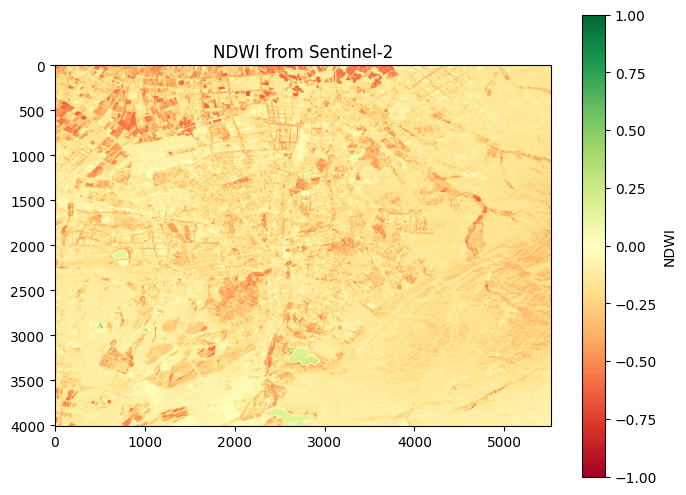

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 假设你的多波段 tif 文件叫 Urumqi_B03_B08.tif
tif_file = "Urumqi_B03_B08.tif"

with rasterio.open(tif_file) as src:
    print("波段数量:", src.count)
    print("图像尺寸:", src.width, "x", src.height)
    print("投影信息:", src.crs)

    # Sentinel-2: B3 (Green), B8 (NIR)
    # 注意：不同文件来源波段顺序可能不同，这里假设B3是第1个波段，B8是第2个
    green = src.read(1).astype('float32')  # 读取B3
    nir = src.read(2).astype('float32')    # 读取B8

# 避免除零错误
leak_mask = (green - nir) / (green + nir + 1e-10)

# 可视化 NDWI
plt.figure(figsize=(8,6))
plt.imshow(leak_mask, cmap='RdYlGn')
plt.colorbar(label="NDWI")
plt.title("NDWI from Sentinel-2")
plt.show()


C:\Users\pluto\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pluto\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pluto\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28431 (\N{CJK UNIFIED IDEOGRAPH-6F0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pluto\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pluto\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 213

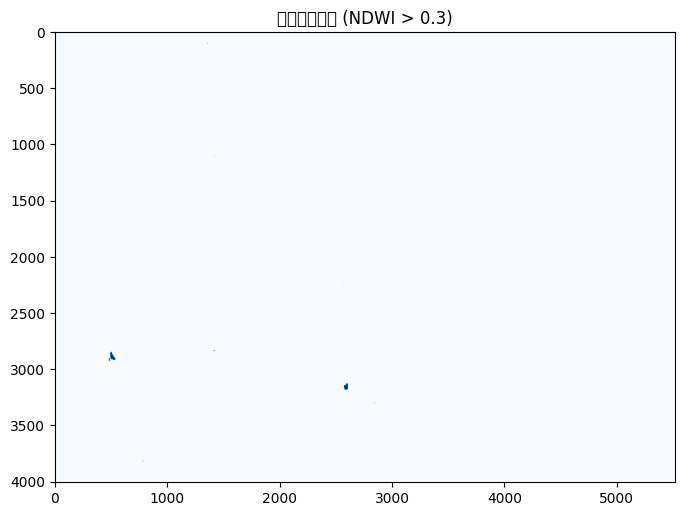

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 ndwi 是之前计算好的 NDWI 数组
leak_mask = ndwi > 0.3  # NDWI 高于阈值的地方可能漏水

# 可视化
plt.figure(figsize=(8,6))
plt.imshow(leak_mask, cmap='Blues')  # True 显示为蓝色
plt.title("可能漏水区域 (NDWI > 0.3)")
plt.show()
